# Setup

## Imports

In [327]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(100)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

path = r"../../../data/raw/formula-1-world-championship-1950-2020/versions/24/"

## Reader Files

### Datasets

### Uitleg
Ik heb deze dataset gekozen, omdat het Formule 1 seizoen weer vol op van start is gegaan en daarom bezig wou zijn met het voorspellen van rondetijden

### Beschrijving
In deze datasets staan de gegevens van alle gereden circuits, kwalificaties, vrije trainingen, sprintraces en sprint kwallificaties. Daarnaast staan ook alle gegevens van alle coureurs, constructeurs en circuits in de datasets. Ook staan de statusen die behoren bij resultaten erin.

<h3>Circuit</h3>
<table border="1">
  <thead>
    <tr><th>Kolom</th><th>Beschrijving</th><th>Type</th></tr>
  </thead>
  <tbody>
    <tr><td>CircuitId</td><td>Id om circuit te identificeren</td><td>—</td></tr>
    <tr><td>CircuitRef</td><td>Naam van circuit in lowercase</td><td>—</td></tr>
    <tr><td>Name</td><td>Naam van circuit</td><td>—</td></tr>
    <tr><td>Location</td><td>Stad waar circuit staat</td><td>—</td></tr>
    <tr><td>Country</td><td>Land waar circuit staat</td><td>—</td></tr>
    <tr><td>Lat</td><td>Lattitude</td><td>—</td></tr>
    <tr><td>Lng</td><td>Longtitude</td><td>—</td></tr>
    <tr><td>Alt</td><td>Altitude</td><td>—</td></tr>
    <tr><td>Url</td><td>URL naar info circuit</td><td>—</td></tr>
  </tbody>
</table>

<h3>Constructor results</h3>
<table border="1">
  <thead>
    <tr><th>Kolom</th><th>Beschrijving</th><th>Type</th></tr>
  </thead>
  <tbody>
    <tr><td>ConstructorResultId</td><td>Id om constructeurs resultaat te identificeren</td><td>—</td></tr>
    <tr><td>RaceId</td><td>Id om het resultaat naar te identificeren met de juiste race</td><td>—</td></tr>
    <tr><td>ConstructorId</td><td>Id om de constructeur te koppelen aan het resultaat</td><td>—</td></tr>
    <tr><td>Points</td><td>Het aantal gewonnen punten</td><td>regression</td></tr>
    <tr><td>Status</td><td>Id dat verwijst naar de status</td><td>classification</td></tr>
  </tbody>
</table>

<h3>Constructor standings</h3>
<table border="1">
  <thead>
    <tr><th>Kolom</th><th>Beschrijving</th><th>Type</th></tr>
  </thead>
  <tbody>
    <tr><td>ConstructorstandingsId</td><td>Id om de constructeurs positie te identificeren</td><td>—</td></tr>
    <tr><td>RaceId</td><td>Id om het resultaat naar te identificeren met de juiste race</td><td>—</td></tr>
    <tr><td>constructorId</td><td>Id om de constructeur te koppelen aan het resultaat</td><td>—</td></tr>
    <tr><td>points</td><td>Het aantal gewonnen punten</td><td>regression</td></tr>
    <tr><td>position</td><td>De plek waar de constructeur is geëindigd</td><td>classification</td></tr>
    <tr><td>positionText</td><td>De plek waar de constructeur is geëindigd in tekst</td><td>classification</td></tr>
    <tr><td>wins</td><td>Het aantal wins dat seizoen (tot nu toe)</td><td>regression</td></tr>
  </tbody>
</table>

<h3>Constructors</h3>
<table border="1">
  <thead>
    <tr><th>Kolom</th><th>Beschrijving</th><th>Type</th></tr>
  </thead>
  <tbody>
    <tr><td>constructorId</td><td>Id om de constructeur te identificeren</td><td>—</td></tr>
    <tr><td>constructorRef</td><td>Naam constructeur in lowercase</td><td>—</td></tr>
    <tr><td>name</td><td>Naam constructeur</td><td>—</td></tr>
    <tr><td>nationality</td><td>Afkomst constructeur</td><td>—</td></tr>
    <tr><td>url</td><td>Url voor informatie</td><td>—</td></tr>
  </tbody>
</table>

<h3>Drivers Standings</h3>
<table border="1">
  <thead>
    <tr><th>Kolom</th><th>Beschrijving</th><th>Type</th></tr>
  </thead>
  <tbody>
    <tr><td>driverStandingsId</td><td>Id om de coureurspositie te identificeren</td><td>—</td></tr>
    <tr><td>raceId</td><td>Id om het resultaat naar te identificeren met de juiste race</td><td>—</td></tr>
    <tr><td>driverId</td><td>Id om het resultaat aan de juiste driver te koppelen</td><td>—</td></tr>
    <tr><td>points</td><td>Aantal gewonnen punten</td><td>regression</td></tr>
    <tr><td>position</td><td>Positie in het kampioensschap</td><td>classification</td></tr>
    <tr><td>positionText</td><td>Positie in het kampioensschap in tekst</td><td>classification</td></tr>
    <tr><td>wins</td><td>Aantal gewonnen races</td><td>regression</td></tr>
  </tbody>
</table>

<h3>Drivers</h3>
<table border="1">
  <thead>
    <tr><th>Kolom</th><th>Beschrijving</th><th>Type</th></tr>
  </thead>
  <tbody>
    <tr><td>driverId</td><td>Id om de coureur te identificeren</td><td>—</td></tr>
    <tr><td>driverRef</td><td>Naam coureur lowercase</td><td>—</td></tr>
    <tr><td>number</td><td>Coureurs nummer</td><td>—</td></tr>
    <tr><td>code</td><td>Coureurs code</td><td>—</td></tr>
    <tr><td>forename</td><td>Voornaam coureur</td><td>—</td></tr>
    <tr><td>surname</td><td>Achternaam coureur</td><td>—</td></tr>
    <tr><td>dob</td><td>Geboorte datum coureur</td><td>—</td></tr>
    <tr><td>nationality</td><td>Nationaliteit coureur</td><td>—</td></tr>
    <tr><td>url</td><td>Informatie over coureur</td><td>—</td></tr>
  </tbody>
</table>

<h3>Lap times</h3>
<table border="1">
  <thead>
    <tr><th>Kolom</th><th>Beschrijving</th><th>Type</th></tr>
  </thead>
  <tbody>
    <tr><td>raceId</td><td>Id om de tijd te koppelen aan de desbetreffende race</td><td>—</td></tr>
    <tr><td>driverId</td><td>Id om de tijd te koppelen aan de desbetreffende coureur</td><td>—</td></tr>
    <tr><td>lap</td><td>In welke ronde de tijd was neergezet</td><td>—</td></tr>
    <tr><td>position</td><td>De plek waar de coureur op dat moment stond in de race</td><td>classification</td></tr>
    <tr><td>time</td><td>De tijd van de ronde</td><td>regression</td></tr>
    <tr><td>milliseconds</td><td>De tijd van de ronde in millisecondes</td><td>regression</td></tr>
  </tbody>
</table>

<h3>Pit stops</h3>
<table border="1">
  <thead>
    <tr><th>Kolom</th><th>Beschrijving</th><th>Type</th></tr>
  </thead>
  <tbody>
    <tr><td>raceId</td><td>Id om de pitstop te koppelen aan de race</td><td>—</td></tr>
    <tr><td>driverId</td><td>Id om de pitstop te koppelen aan de coureur</td><td>—</td></tr>
    <tr><td>stop</td><td>De hoeveelste stop het was in de race</td><td>—</td></tr>
    <tr><td>lap</td><td>De ronde waarin de pitstop werd uitgevoerd</td><td>—</td></tr>
    <tr><td>time</td><td>De tijd wanneer de pitstop is uitgevoerd</td><td>—</td></tr>
    <tr><td>duration</td><td>De tijd hoelang de pitstop duurde</td><td>regression</td></tr>
    <tr><td>milliseconds</td><td>De tijd hoelang de pitstop duurde in millisecondes</td><td>regression</td></tr>
  </tbody>
</table>

<h3>Qualifying</h3>
<table border="1">
  <thead>
    <tr><th>Kolom</th><th>Beschrijving</th><th>Type</th></tr>
  </thead>
  <tbody>
    <tr><td>qualifyId</td><td>Id om de kwalificatie te identificeren</td><td>—</td></tr>
    <tr><td>raceId</td><td>Id om de desbetreffende race te koppelen aan de kwalificatie</td><td>—</td></tr>
    <tr><td>driverId</td><td>Id om de desbetreffende coureur aan de kwalificatie te koppelen</td><td>—</td></tr>
    <tr><td>constructorId</td><td>Id om de constructeur te koppelen aan de kwalificatie</td><td>—</td></tr>
    <tr><td>number</td><td>Nummer van coureur</td><td>—</td></tr>
    <tr><td>position</td><td>Geëindigde kwalificatie positie</td><td>classification</td></tr>
    <tr><td>q1</td><td>Beste tijd in Q1</td><td>regression</td></tr>
    <tr><td>q2</td><td>Beste tijd in Q2</td><td>regression</td></tr>
    <tr><td>q3</td><td>Beste tijd in Q3</td><td>regression</td></tr>
  </tbody>
</table>

<h3>Races</h3>
<table border="1">
  <thead>
    <tr><th>Kolom</th><th>Beschrijving</th><th>Type</th></tr>
  </thead>
  <tbody>
    <tr><td>raceId</td><td>Id om de race te identificeren</td><td>—</td></tr>
    <tr><td>year</td><td>Het jaar dat er is geraced</td><td>—</td></tr>
    <tr><td>round</td><td>De ronde op de kalender</td><td>—</td></tr>
    <tr><td>circuitId</td><td>Id om de race te koppelen aan het desbetreffende circuit</td><td>—</td></tr>
    <tr><td>name</td><td>De circuit naam</td><td>—</td></tr>
    <tr><td>date</td><td>De datum</td><td>—</td></tr>
    <tr><td>time</td><td>De tijd van start race</td><td>—</td></tr>
    <tr><td>url</td><td>URL voor informatie</td><td>—</td></tr>
  </tbody>
</table>

<h3>Results & Sprint results</h3>
<table border="1">
  <thead>
    <tr><th>Kolom</th><th>Beschrijving</th><th>Type</th></tr>
  </thead>
  <tbody>
    <tr><td>resultId</td><td>Id om het resultaat te identificeren</td><td>—</td></tr>
    <tr><td>raceId</td><td>Id om het resultaat te koppelen aan de desbetreffende race</td><td>—</td></tr>
    <tr><td>driverId</td><td>Id om het resultaat te koppelen aan de desbetreffende coureur</td><td>—</td></tr>
    <tr><td>constructorId</td><td>Id om het resultaat te koppelen aan de desbetreffende constructeur</td><td>—</td></tr>
    <tr><td>number</td><td>Coureurs nummer</td><td>—</td></tr>
    <tr><td>grid</td><td>Startplek op de grid</td><td>—</td></tr>
    <tr><td>position</td><td>Start positie</td><td>classification</td></tr>
    <tr><td>positionText</td><td>Start positie Tekst</td><td>classification</td></tr>
    <tr><td>positionOrder</td><td>Start positie geordend</td><td>classification</td></tr>
    <tr><td>points</td><td>Aantal punten behaald</td><td>regression</td></tr>
    <tr><td>laps</td><td>Aantal rondes gereden</td><td>regression</td></tr>
    <tr><td>time</td><td>Tijd gedaan over de race</td><td>regression</td></tr>
    <tr><td>milliseconds</td><td>Tijd gedaan over de race in millisecondes</td><td>regression</td></tr>
    <tr><td>fastestLap</td><td>Wanneer de snelste ronde is gezet door de coureur</td><td>regression</td></tr>
    <tr><td>rank</td><td>Eindpositie</td><td>classification</td></tr>
    <tr><td>fastestLapTime</td><td>Snelste ronde van coureur</td><td>regression</td></tr>
    <tr><td>fastestLapSpeed</td><td>Snelste ronde gemiddelde snelheid van coureur</td><td>regression</td></tr>
    <tr><td>statusId</td><td>Id om het resultaat te koppelen aan de desbetreffende status</td><td>classification</td></tr>
    </tbody>
</table> 
<h3>Seasons</h3>
<table border="1">
  <thead>
    <tr><th>Kolom</th><th>Beschrijving</th><th>Type</th></tr>
  </thead>
  <tbody>
    <tr><td>year</td><td>Jaar van het seizoen</td><td>—</td></tr>
    <tr><td>url</td><td>Informatie over het seizoen</td><td>—</td></tr>
  </tbody>
</table>

<h3>Status</h3>
<table border="1">
  <thead>
    <tr><th>Kolom</th><th>Beschrijving</th><th>Type</th></tr>
  </thead>
  <tbody>
    <tr><td>statusId</td><td>Id om de status te identificeren</td><td>—</td></tr>
    <tr><td>status</td><td>Inhoud van de statuscode</td><td>Regression</td></tr>
  </tbody>
</table>


### Uiteindelijke Dataset
Na kollomen uitgefilterd te hebben heb ik dit overgehouden voor het trainen van mijn modellen
<table border="1">
  <thead>
    <tr><th>Kolomnaam</th><th>Reden</th></tr>
  </thead>
  <tbody>
    <tr><td>code</td><td>Code om de coureur te achterhalen</td></tr>
    <tr><td>number</td><td>Nummer van de coureur, zodat als er coureurs zijn met dezelfde code (Zoals Michale Schumacher en Mick Schumacher) kan je ze uit elkaar houden door hun nummer</td></tr>
    <tr><td>q1</td><td>Snelste tijd van q1</td></tr>
    <tr><td>q2</td><td>Snelste tijd van q2</td></tr>
    <tr><td>q3</td><td>Snelste tijd van q3, uiteindelijk worden alle 3 de kwalificatie tijden het gemiddelde genomen</td></tr>
    <tr><td>fastestLapTime</td><td>Snelste tijd neergezet gehele weekend</td></tr>
    <tr><td>circuit</td><td>Om te bepalen welk circuit je wilt voorspellen voor de snelste ronde</td></tr>
  </tbody>
</table>



In [121]:
def create_dataframes_csv(path):
    frame = pd.read_csv(path)
    
    return frame

In [122]:
def prefix_columns(df, table_name, exclude=None):
    if exclude is None:
        exclude = []
    return df.rename(columns={
        col: f"{table_name}__{col}" if col not in exclude else col
        for col in df.columns
    })

drivers = prefix_columns(create_dataframes_csv(f"{path}drivers.csv"), "drivers")
constructors = prefix_columns(create_dataframes_csv(f"{path}constructors.csv"), "constructors")
constructor_standings = prefix_columns(create_dataframes_csv(f"{path}constructor_standings.csv"), "constructor_standings")
qualifying = prefix_columns(create_dataframes_csv(f"{path}qualifying.csv"), "qualifying")
circuits = prefix_columns(create_dataframes_csv(f"{path}circuits.csv"), "circuits")
results = prefix_columns(create_dataframes_csv(f"{path}results.csv"), "results")
pit_stops = prefix_columns(create_dataframes_csv(f"{path}pit_stops.csv"), "pit_stops")
races = prefix_columns(create_dataframes_csv(f"{path}races.csv"), "races")

drivers = drivers.drop(columns=[
    "drivers__url", "drivers__dob"
])

constructors = constructors.drop(columns=[
    "constructors__url"
])

constructor_standings = constructor_standings.drop(columns=[
    "constructor_standings__positionText"
])

circuits = circuits.drop(columns=[
    "circuits__url", "circuits__alt", "circuits__lng", "circuits__lng"
])

results = results.drop(columns=[
    "results__positionText"
])

races = races.drop(columns=[
    "races__url"
])

total = pd.merge(drivers, results, left_on="drivers__driverId", right_on="results__driverId")
total = pd.merge(total, races, left_on="results__raceId", right_on="races__raceId")
total = pd.merge(total, circuits, left_on="races__circuitId", right_on="circuits__circuitId")
total = pd.merge(total, qualifying, left_on=["races__raceId", "drivers__driverId"], right_on=["qualifying__raceId", "qualifying__driverId"])
total = pd.merge(total, pit_stops, left_on=["qualifying__raceId", "qualifying__driverId"], right_on=["pit_stops__raceId", "pit_stops__driverId"])
total = pd.merge(total, constructors, left_on="qualifying__constructorId", right_on="constructors__constructorId")
total = pd.merge(total, constructor_standings, left_on="constructors__constructorId", right_on="constructor_standings__constructorId")

total = total.drop(columns=[
    "drivers__driverId",
    "results__driverId", "results__raceId", "results__constructorId", "results__statusId", "results__number", "results__driverId",
    "races__raceId", "races__circuitId",
    "circuits__circuitId",
    "qualifying__qualifyId", "qualifying__raceId", "qualifying__driverId", "qualifying__constructorId", "qualifying__number",
    "pit_stops__driverId",
    "constructors__constructorId",
    "constructor_standings__constructorStandingsId", "constructor_standings__raceId", "constructor_standings__constructorId"
])

total = total.drop_duplicates()

total


,drivers__driverRef,drivers__number,drivers__code,drivers__forename,drivers__surname,drivers__nationality,results__resultId,results__grid,results__position,results__positionOrder,...,pit_stops__lap,pit_stops__time,pit_stops__duration,pit_stops__milliseconds,constructors__constructorRef,constructors__name,constructors__nationality,constructor_standings__points,constructor_standings__position,constructor_standings__wins
0,hamilton,44,HAM,Lewis,Hamilton,British,20780,2,2,2,...,16,17:28:24,23.227,23227,mclaren,McLaren,British,14.0,1,1
1,hamilton,44,HAM,Lewis,Hamilton,British,20780,2,2,2,...,16,17:28:24,23.227,23227,mclaren,McLaren,British,24.0,1,1
2,hamilton,44,HAM,Lewis,Hamilton,British,20780,2,2,2,...,16,17:28:24,23.227,23227,mclaren,McLaren,British,28.0,3,1
3,hamilton,44,HAM,Lewis,Hamilton,British,20780,2,2,2,...,16,17:28:24,23.227,23227,mclaren,McLaren,British,34.0,3,1
4,hamilton,44,HAM,Lewis,Hamilton,British,20780,2,2,2,...,16,17:28:24,23.227,23227,mclaren,McLaren,British,42.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020547,doohan,61,DOO,Jack,Doohan,Australian,26759,17,15,15,...,22,17:37:42,22.080,22080,alpine,Alpine F1 Team,French,14.0,9,0
5020548,doohan,61,DOO,Jack,Doohan,Australian,26759,17,15,15,...,22,17:37:42,22.080,22080,alpine,Alpine F1 Team,French,49.0,6,0
5020549,doohan,61,DOO,Jack,Doohan,Australian,26759,17,15,15,...,22,17:37:42,22.080,22080,alpine,Alpine F1 Team,French,49.0,7,0
5020550,doohan,61,DOO,Jack,Doohan,Australian,26759,17,15,15,...,22,17:37:42,22.080,22080,alpine,Alpine F1 Team,French,59.0,6,0


In [123]:
print(total.columns)

Index(['drivers__driverRef', 'drivers__number', 'drivers__code',
       'drivers__forename', 'drivers__surname', 'drivers__nationality',
       'results__resultId', 'results__grid', 'results__position',
       'results__positionOrder', 'results__points', 'results__laps',
       'results__time', 'results__milliseconds', 'results__fastestLap',
       'results__rank', 'results__fastestLapTime', 'results__fastestLapSpeed',
       'races__year', 'races__round', 'races__name', 'races__date',
       'races__time', 'races__fp1_date', 'races__fp1_time', 'races__fp2_date',
       'races__fp2_time', 'races__fp3_date', 'races__fp3_time',
       'races__quali_date', 'races__quali_time', 'races__sprint_date',
       'races__sprint_time', 'circuits__circuitRef', 'circuits__name',
       'circuits__location', 'circuits__country', 'circuits__lat',
       'qualifying__position', 'qualifying__q1', 'qualifying__q2',
       'qualifying__q3', 'pit_stops__raceId', 'pit_stops__stop',
       'pit_stops__lap', 

# Fastest lap prediction

### Dataset

In [321]:
def time_to_seconds(t):
    try:
        if t == "0:00.000" or pd.isna(t):
            return 0.0
        mins, rest = t.split(":")
        return int(mins) * 60 + float(rest)
    except:
        return 0.0

circuit = input(str("Circuit: "))

fastes_lap_data = pd.DataFrame()

fastes_lap_data = total[["drivers__code", "drivers__number", 
                         "circuits__name",
                         "qualifying__q1", "qualifying__q2", "qualifying__q3",
                         "results__fastestLapTime",]]

fastes_lap_data = fastes_lap_data.drop_duplicates()

for index, row in fastes_lap_data.iterrows():
    if (str(row["circuits__name"]).lower() != circuit.lower()):
        fastes_lap_data.drop(index, inplace=True)

fastes_lap_data[["qualifying__q1", "qualifying__q2", "qualifying__q3"]] = \
    fastes_lap_data[["qualifying__q1", "qualifying__q2", "qualifying__q3"]].fillna("0:00.000")

for col in ["qualifying__q1", "qualifying__q2", "qualifying__q3"]:
    fastes_lap_data[col] = fastes_lap_data[col].apply(time_to_seconds)

meta = fastes_lap_data[["drivers__code", "drivers__number", "circuits__name"]].reset_index(drop=True)

X_full = pd.concat([fastes_lap_data[["qualifying__q1", "qualifying__q2", "qualifying__q3"]],
                    pd.get_dummies(fastes_lap_data[["drivers__code", "drivers__number", 
                                                    "circuits__name"]], drop_first=True)],
                   axis=1)

fastes_lap_data["fastestLapSeconds"] = fastes_lap_data["results__fastestLapTime"].apply(time_to_seconds)
y_full = fastes_lap_data["fastestLapSeconds"]


In [322]:
fastes_lap_data

,drivers__code,drivers__number,circuits__name,qualifying__q1,qualifying__q2,qualifying__q3,results__fastestLapTime,fastestLapSeconds
33444,HAM,44,Autodromo Nazionale di Monza,83.976,83.172,82.725,1:26.187,86.187
75249,HAM,44,Autodromo Nazionale di Monza,84.211,84.394,84.010,1:28.427,88.427
94618,HAM,44,Autodromo Nazionale di Monza,84.589,84.803,0.000,1:25.849,85.849
106513,HAM,44,Autodromo Nazionale di Monza,85.363,84.560,84.109,1:28.004,88.004
118713,HAM,44,Autodromo Nazionale di Monza,84.251,83.383,83.397,1:26.672,86.672
...,...,...,...,...,...,...,...,...
4891239,PIA,81,Autodromo Nazionale di Monza,82.106,81.527,80.785,1:25.072,85.072
4933044,PIA,81,Autodromo Nazionale di Monza,80.076,79.808,79.436,1:21.943,81.943
4969261,SAR,2,Autodromo Nazionale di Monza,81.930,81.944,0.000,1:26.840,86.840
5009264,LAW,30,Autodromo Nazionale di Monza,82.112,81.758,0.000,1:25.842,85.842


## Trainen

In [323]:
X_train, X_test, y_train, y_test, meta_train, meta_test = train_test_split(
    X_full, y_full, meta, test_size=0.5, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 2.0948417153439127


In [324]:
results_df = pd.DataFrame({
    "Driver": meta_test["drivers__code"].values,
    "Number": meta_test["drivers__number"].values,
    "Circuit": meta_test["circuits__name"].values,
    "Predicted (s)": y_pred,
    "Actual (s)": y_test.values
})

results_df = results_df.sort_values(by=["Actual (s)"])

results_df


,Driver,Number,Circuit,Predicted (s),Actual (s)
78,NAS,12,Autodromo Nazionale di Monza,86.758450,0.000
53,NOR,4,Autodromo Nazionale di Monza,83.414150,81.432
17,PIA,81,Autodromo Nazionale di Monza,83.364740,81.943
58,RUS,63,Autodromo Nazionale di Monza,83.353720,82.036
64,STR,18,Autodromo Nazionale di Monza,84.280419,82.232
...,...,...,...,...,...
61,DLR,\N,Autodromo Nazionale di Monza,90.481860,90.398
23,GLO,\N,Autodromo Nazionale di Monza,90.129290,90.783
98,KAR,\N,Autodromo Nazionale di Monza,90.086730,91.086
111,MER,98,Autodromo Nazionale di Monza,90.614650,91.311


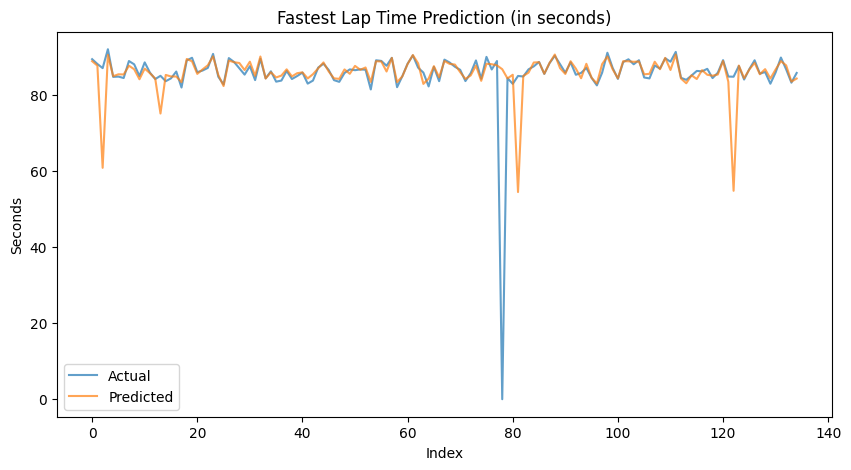

In [325]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.title("Fastest Lap Time Prediction (in seconds)")
plt.ylabel("Seconds")
plt.xlabel("Index")
plt.legend()
plt.show()


## Decision Tree

Regressor wordt gebruikt i.p.v. Class, omdat er gewerkt wordt met float nummers, inplaats van normale nummers

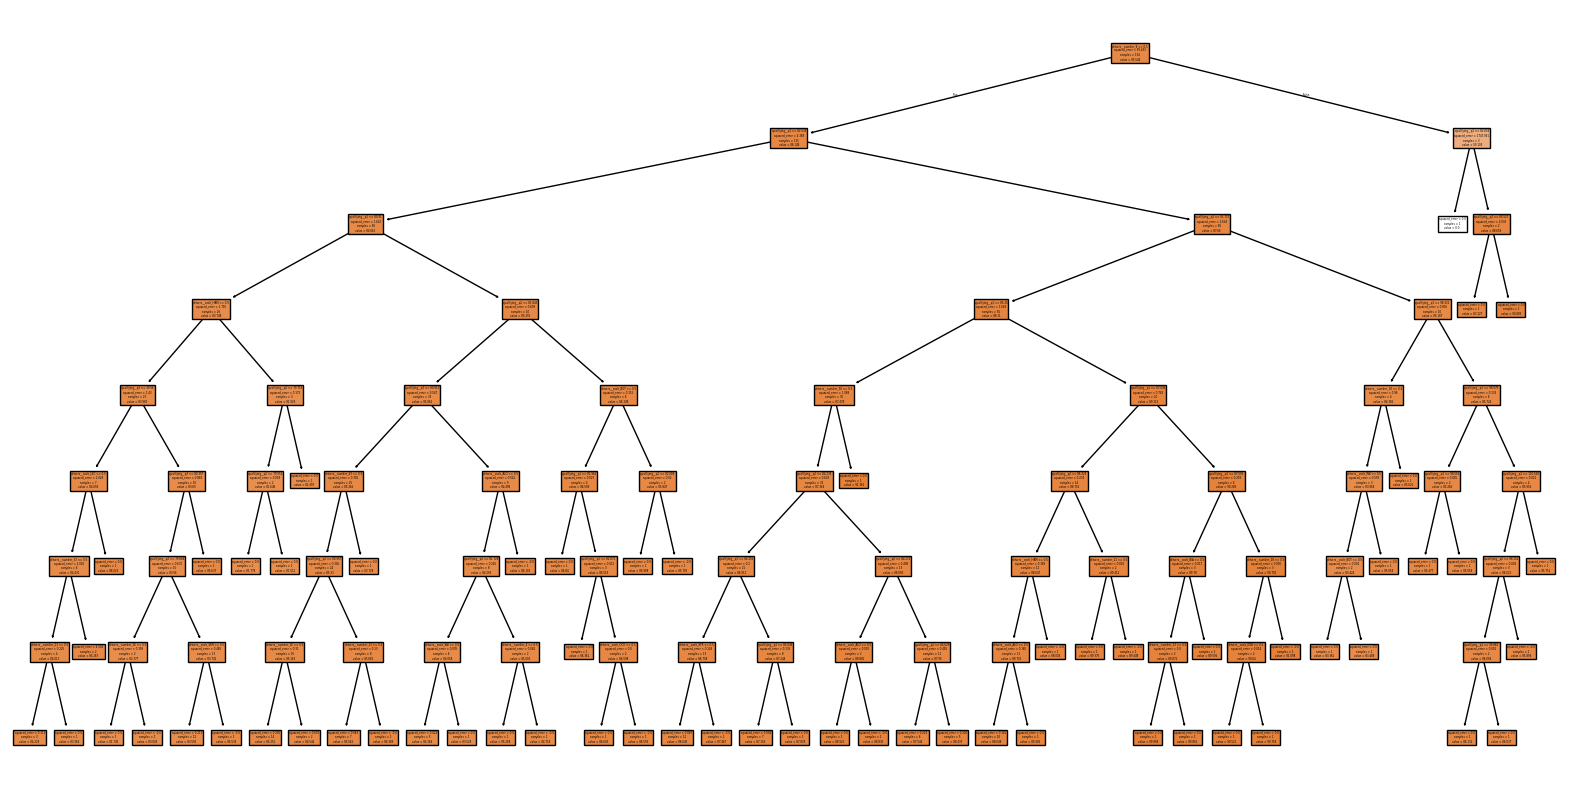

In [328]:
dtree = DecisionTreeRegressor(max_depth=8, random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(dtree, feature_names=X_train.columns, filled=True)
plt.show()


## Confusion Matrix

In [329]:
def predict(X_test, y_test, predict_column_name, y_column_name):
    predicted_df = pd.DataFrame(dtree.predict(X_test), columns=[predict_column_name])
    actual_series = pd.Series(y_test, name=y_column_name)
    actual_df = actual_series.reset_index(drop=True).to_frame()
    return pd.concat([actual_df, predicted_df], axis=1)


In [330]:
model_results_frame = predict(X_test, y_test, "Predicted (s)", "Actual (s)")
model_results_frame

,Actual (s),Predicted (s)
0,89.399,88.647500
1,88.140,87.543833
2,87.043,87.227000
3,92.013,90.521000
4,84.745,85.561714
...,...,...
130,85.919,86.645000
131,89.825,88.647500
132,86.716,87.543833
133,83.219,83.592333


In [331]:
actual = []
predicted = []

for x in model_results_frame["Actual (s)"]:
    actual.append(int(x))
    
for x in model_results_frame["Predicted (s)"]:
    predicted.append(int(x))
    
print(len(actual), len(predicted))

135 135


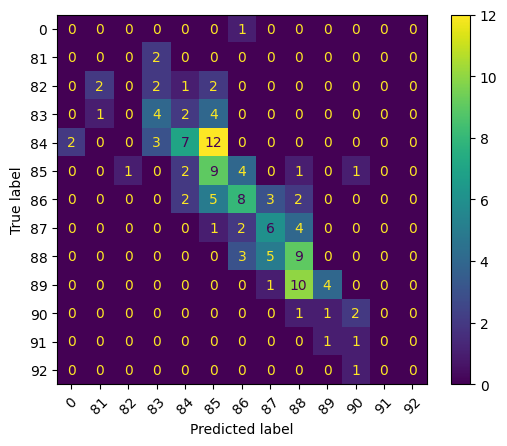

In [332]:
labels = sorted(set(actual) | set(predicted))

confusion_matrix = metrics.confusion_matrix(
    actual,
    predicted
)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)
cm_display.plot()
plt.xticks(rotation=45)
plt.show()


## Neural Network Regression

In [333]:
ct = make_column_transformer(
    (MinMaxScaler(), ["qualifying__q1", "qualifying__q2", "qualifying__q3"])
)

ct.fit(X_train)
X_train_normalized = ct.transform(X_train)
X_test_normalized = ct.transform(X_test)
X_train_normalized

array([[0.82000278, 0.        , 0.        ],
       [0.98141009, 0.99323121, 0.9945853 ],
       [0.85191662, 0.87328617, 0.        ],
       [0.80031   , 0.81460634, 0.81285687],
       [0.80963973, 0.82517176, 0.        ],
       [0.82037041, 0.83944221, 0.        ],
       [0.81136856, 0.82723803, 0.82197637],
       [0.83436997, 0.84657743, 0.84197616],
       [0.82216879, 0.        , 0.        ],
       [0.81275957, 0.        , 0.        ],
       [0.79584882, 0.81128811, 0.81113678],
       [0.83124019, 0.84987531, 0.        ],
       [0.82724599, 0.84432796, 0.84310592],
       [0.97604475, 0.98764314, 0.997313  ],
       [0.83128987, 0.84888798, 0.        ],
       [0.        , 0.        , 0.        ],
       [0.858514  , 0.        , 0.        ],
       [0.81521372, 0.83167591, 0.82975237],
       [0.81404129, 0.83407807, 0.        ],
       [0.7988395 , 0.81351723, 0.8147398 ],
       [0.81516404, 0.82999644, 0.82866332],
       [0.80597341, 0.82192478, 0.81894332],
       [0.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.2650 - mse: 52.2650 
[65.43497467041016, 65.43497467041016]


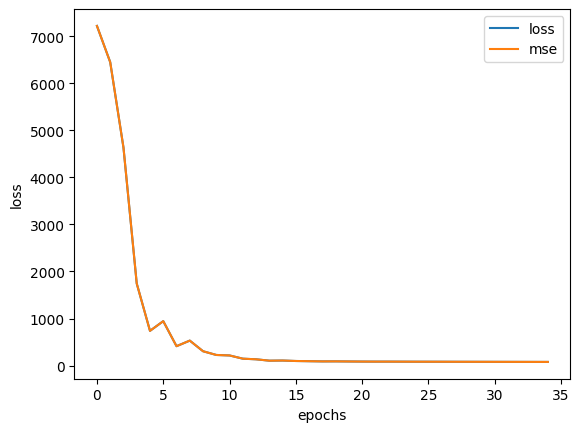

In [334]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mse"]
)

history = model_1.fit(X_train_normalized, y_train, epochs=35, verbose=0)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
print(model_1.evaluate(X_test_normalized, y_test))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Length of y_predict: 135
Length of y_test: 135
135 135 135


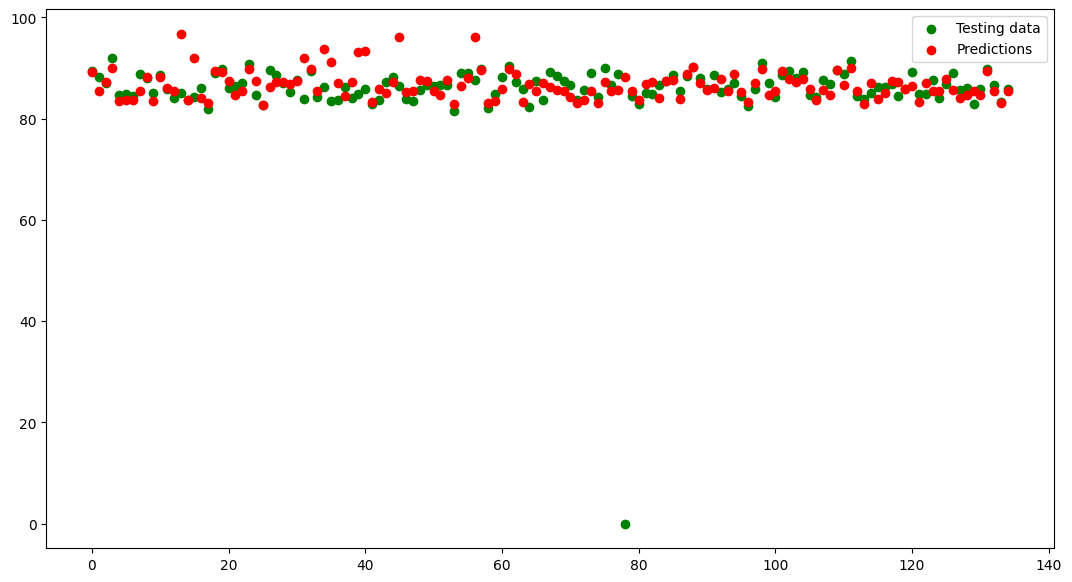

In [335]:
def plot_predictions(test_X, test_Y, pred_Y):
    plt.figure(figsize=(13, 7))
    plt.scatter(test_X, test_Y, c="g", label="Testing data")
    plt.scatter(test_X, pred_Y, c="r", label="Predictions")
    plt.legend()
    plt.show()

y_predict = model_1.predict(X_test_normalized)

y_test = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test
y_predict = tf.squeeze(y_predict).numpy() 

if isinstance(y_test, pd.DataFrame):
    y_test = y_test.iloc[:, 0].to_numpy() 

print(f"Length of y_predict: {len(y_predict)}")
print(f"Length of y_test: {len(y_test)}")

test_X = tf.range(0, len(y_test)).numpy()

print(len(test_X), len(y_test), len(y_predict))

plot_predictions(test_X, y_test, y_predict)


## Vergelijking (Decision Tree VS Neural Network)

### Decision Tree
Voordelen:<br/>
1: Makkelijk te implementeren<br/>
2: Vaak goede prestaties<br/>
3: Nauwkeurig op het moment dat relaties tussen features en output relatief lineair of makkelijk te splitsen zijn<br/>
4: Visueel beslissingen volgen<br/><br/>
Nadelen:<br/>
1: Groot risico op overfitting<br/>
2: Op het moment dat er geen goede relaties tussen features en outputs zijn, wordt het ingewikkeld om te splitsen<br/>


In [336]:
for index, row in model_results_frame.iterrows():
    print(row.to_dict())


{'Actual (s)': 89.399, 'Predicted (s)': 88.64750000000001}
{'Actual (s)': 88.14, 'Predicted (s)': 87.54383333333334}
{'Actual (s)': 87.043, 'Predicted (s)': 87.227}
{'Actual (s)': 92.013, 'Predicted (s)': 90.521}
{'Actual (s)': 84.745, 'Predicted (s)': 85.56171428571429}
{'Actual (s)': 84.812, 'Predicted (s)': 85.25107142857144}
{'Actual (s)': 84.446, 'Predicted (s)': 85.25107142857144}
{'Actual (s)': 88.914, 'Predicted (s)': 87.54383333333334}
{'Actual (s)': 88.037, 'Predicted (s)': 86.645}
{'Actual (s)': 84.971, 'Predicted (s)': 85.25107142857144}
{'Actual (s)': 88.55199999999999, 'Predicted (s)': 86.645}
{'Actual (s)': 85.842, 'Predicted (s)': 85.56171428571429}
{'Actual (s)': 84.16499999999999, 'Predicted (s)': 84.22933333333333}
{'Actual (s)': 85.02, 'Predicted (s)': 90.083}
{'Actual (s)': 83.60900000000001, 'Predicted (s)': 85.25107142857144}
{'Actual (s)': 84.351, 'Predicted (s)': 83.361}
{'Actual (s)': 86.144, 'Predicted (s)': 84.16439999999999}
{'Actual (s)': 81.943, 'Predicte

### Neural Network
Voordelen:<br/>
1: Krachtig in het leren van niet-lineaire relaties of als de data complex is<br/>
2: Als een neuron network goed is opgebouwd en er voldoende data beschikbaar is kan er relatief goed nieuwe data gegeneraliseerd worden<br/><br/>
Nadelen:<br/>
1: Kost meer resources om te trainen dan een decision tree<br/>
2: Er is meer tijd nodig om te trainen<br/>
3: Er is veel tijd nodig om een goed neuron network op te bouwen

In [337]:
results_df = pd.DataFrame({
    "Actual (s) (NN)": y_test,
    "Predicted (s) (NN)": y_predict
})

for index, row in results_df.iterrows():
    print(row.to_dict())

{'Actual (s) (NN)': 89.399, 'Predicted (s) (NN)': 89.2831802368164}
{'Actual (s) (NN)': 88.14, 'Predicted (s) (NN)': 85.49207305908203}
{'Actual (s) (NN)': 87.043, 'Predicted (s) (NN)': 87.1501235961914}
{'Actual (s) (NN)': 92.013, 'Predicted (s) (NN)': 90.02001953125}
{'Actual (s) (NN)': 84.745, 'Predicted (s) (NN)': 83.56519317626953}
{'Actual (s) (NN)': 84.812, 'Predicted (s) (NN)': 83.59396362304688}
{'Actual (s) (NN)': 84.446, 'Predicted (s) (NN)': 83.67777252197266}
{'Actual (s) (NN)': 88.914, 'Predicted (s) (NN)': 85.53533172607422}
{'Actual (s) (NN)': 88.037, 'Predicted (s) (NN)': 88.1563491821289}
{'Actual (s) (NN)': 84.971, 'Predicted (s) (NN)': 83.40184783935547}
{'Actual (s) (NN)': 88.55199999999999, 'Predicted (s) (NN)': 88.27181243896484}
{'Actual (s) (NN)': 85.842, 'Predicted (s) (NN)': 86.04460144042969}
{'Actual (s) (NN)': 84.16499999999999, 'Predicted (s) (NN)': 85.41814422607422}
{'Actual (s) (NN)': 85.02, 'Predicted (s) (NN)': 96.76300811767578}
{'Actual (s) (NN)': 

In [338]:
combined = pd.concat([
    model_results_frame.reset_index(drop=True),
    results_df.reset_index(drop=True)
], axis=1)

tree = 0
network = 0

combined["Tree Error"] = abs(combined["Actual (s)"] - combined["Predicted (s)"])
combined["NN Error"] = abs(combined["Actual (s) (NN)"] - combined["Predicted (s) (NN)"])

combined["Better Model"] = combined.apply(
    lambda row: "Tree" if row["Tree Error"] < row["NN Error"] else "Neural Network",
    axis=1
)

for index, row in combined.iterrows():
    print(row.to_dict(), f"Differnce Tree = {row[0]-row[1]}", f"Difference Network = {row[2] - row[3]}", f"Winner: {row[-1]}")
    
    if row[-1] == "Tree":
        tree += 1
    else:
        network += 1

print(tree, network)


{'Actual (s)': 89.399, 'Predicted (s)': 88.64750000000001, 'Actual (s) (NN)': 89.399, 'Predicted (s) (NN)': 89.2831802368164, 'Tree Error': 0.751499999999993, 'NN Error': 0.11581976318359466, 'Better Model': 'Neural Network'} Differnce Tree = 0.751499999999993 Difference Network = 0.11581976318359466 Winner: Neural Network
{'Actual (s)': 88.14, 'Predicted (s)': 87.54383333333334, 'Actual (s) (NN)': 88.14, 'Predicted (s) (NN)': 85.49207305908203, 'Tree Error': 0.5961666666666616, 'NN Error': 2.6479269409179693, 'Better Model': 'Tree'} Differnce Tree = 0.5961666666666616 Difference Network = 2.6479269409179693 Winner: Tree
{'Actual (s)': 87.043, 'Predicted (s)': 87.227, 'Actual (s) (NN)': 87.043, 'Predicted (s) (NN)': 87.1501235961914, 'Tree Error': 0.1839999999999975, 'NN Error': 0.10712359619139988, 'Better Model': 'Neural Network'} Differnce Tree = -0.1839999999999975 Difference Network = -0.10712359619139988 Winner: Neural Network
{'Actual (s)': 92.013, 'Predicted (s)': 90.521, 'Actu

C:\Users\jdvis_x5odeao\AppData\Local\Temp\ipykernel_33976\336653652.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(row.to_dict(), f"Differnce Tree = {row[0]-row[1]}", f"Difference Network = {row[2] - row[3]}", f"Winner: {row[-1]}")
C:\Users\jdvis_x5odeao\AppData\Local\Temp\ipykernel_33976\336653652.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[-1] == "Tree":


### Betere methode?
Beide methodes kunnen overfitten. Een decision tree kan al snel overfitten als er geen beperkingen worden opgelegd. Een neural network kan ook overfitten, maar kan beheerst worden, doormiddel van minder epoches toe te passen of een lagere learning rate toe te passen. <br/><br/>
Er moet genoeg data zijn voor het juist voorspellen van gegevens. In dit geval heeft de dataset te weinig gegevens om een neuron network goed te kunnen trainen. <br/><br/>
Het betere model hangt af van de taak die gedaan moet worden en of er genoeg data beschikbaar is om op te traien. In dit geval moeten er hele nauwkeurige tijden uitgerekend worden, waardoor een neuron network voor deze taak een betere keuze zou zijn. Echter is er te weinig data en is de data simpel genoeg voor een decision tree om de niet-lineaire relaties te onderscheiden, waardoor de decision tree een betere keuze is.

### Uitdagingen
#### Voorbereiding
* Het schalen van de data was een uitdaging, om alleen het meest benodigde te behouden en ervoor te zorgen dat er kolommen hetzelfde heten
* Voor beide methodes was het een uitdaging om zo goed mogelijke data te verkrijgen, zonder het model te over fitten.
#### Trainging & Tuning
* Voor het neuron network was het ingewikkeld om te bepalen wat de meest optimale lagen waren en wat de zo juist mogelijke optimizers zijn. Het afstemmen hiervan zorgt voor veel expirimenteren
* Bij beide modellen was het een uitdaging om overfitting te voorkomen, maar tergelijkertijd wel zo veel mogelijk precisie en bruikbare te voorspellen
* Bij het voorspellen van data met een neuron network moet het network zo afgesteld zijn dat het zo precies mogelijke voorspellingen kan doen, zonder dat dit al te veel tijd kost
#### Conclusie
Decision Tree:
* Makkelijk te implementeren
* Kan data met linaire relaties goed splitsen
* Voor minder complexe data een betere keuze
* Kan snel overfitten
* Kan geen complexe nauwkeurige data voorspellen<br/>

Neuron Network:
* Kan niet-linaire relaties goed aan elkaar koppelen
* Is goed in nieuwe data voorspellen
* Kan goed leren op complexe data
* Lastiger te implementeren dan een decision tree
* Het bouwen van een neuron network kan veel tijd kosten om het optimaal te maken
* Hoe minder tijd je hebt voor het voorspellen, hoe groter de kans dat gegenereerde data afwijkt van de reliteit

<br/>
Het voorspellen van ronde tijden is voor de decision tree complex genoeg om zelf de niet-lineaire relaties te zien. Dit komt waarschijnlijk, doordat de dataset die hij krijgt klein genoeg is. De dataset is te klein voor het neuron network om juist te voorspellen. Omdat de dataset te klein is voor het neuron network, is de decision tree momenteel beter dan het neuron network.